# Import the necessary modules 

In [8]:
import torch
import gym
from collections import defaultdict
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
env = gym.make('Blackjack-v0')

we'll predict the value for a simple policy where we stop adding new cards when the score reaches 18

In [9]:
def run_episode(env, hold_score):
  state = env.reset()
  rewards = []
  states = [state]
  is_done = False
  while not is_done:
    action = 1 if state[0] < hold_score else 0
    state, reward, is_done, info = env.step(action)
    states.append(state)
    rewards.append(reward)
    if is_done:
     break
  return states, rewards

In [10]:
def mc_prediction_first_visit(env, hold_score, gamma, n_episode):
  V = defaultdict(float)
  N = defaultdict(int)
  for episode in range(n_episode):
    states_t, rewards_t = run_episode(env, hold_score)
    return_t = 0
    G = {}
    for state_t, reward_t in zip(states_t[1::-1], rewards_t[::-1]):
      return_t = gamma * return_t + reward_t
      G[state_t] = return_t
    for state, return_t in G.items():
      if state[0] <= 21:
        V[state] += return_t
        N[state] += 1
  for state in V:
    V[state] = V[state] / N[state]
  return V

In [11]:
hold_score = 18
gamma = 1
n_episode = 500000
value = mc_prediction_first_visit(env, hold_score, gamma, n_episode)

In [12]:
def plot_surface(X, Y, Z, title):
  fig = plt.figure(figsize=(20, 10))
  ax = fig.add_subplot(111, projection='3d')
  surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap=matplotlib.cm.coolwarm, vmin=-1.0, vmax=1.0)
  ax.set_xlabel('Player Sum')
  ax.set_ylabel('Dealer Showing')
  ax.set_zlabel('Value')
  ax.set_title(title)
  ax.view_init(ax.elev, -120)
  fig.colorbar(surf)
  plt.show()

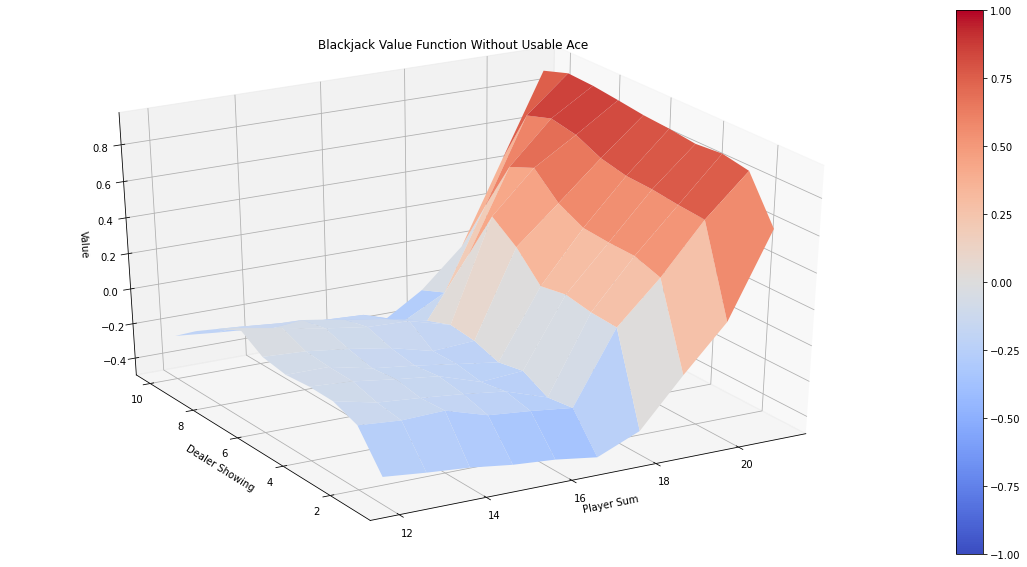

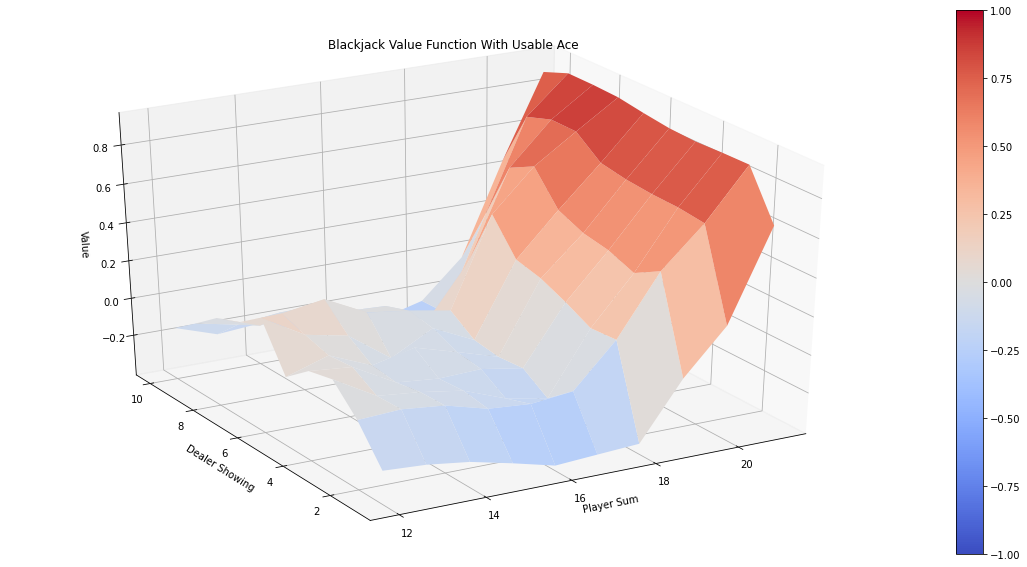

In [13]:
def plot_blackjack_value(V):
  player_sum_range = range(12, 22)
  dealer_show_range = range(1, 11)
  X, Y = torch.meshgrid([torch.tensor(player_sum_range), torch.tensor(dealer_show_range)])
  values_to_plot = torch.zeros((len(player_sum_range), len(dealer_show_range), 2))
  for i, player in enumerate(player_sum_range):
    for j, dealer in enumerate(dealer_show_range):
      for k, ace in enumerate([False, True]):
        values_to_plot[i, j, k] = V[(player, dealer, ace)]
  plot_surface(X, Y, values_to_plot[:,:,0].numpy(),"Blackjack Value Function Without Usable Ace")
  plot_surface(X, Y, values_to_plot[:,:,1].numpy(),"Blackjack Value Function With Usable Ace")
plot_blackjack_value(value)

# helpful resource

[Blackjack game](https://en.wikipedia.org/wiki/Blackjack)